In [1]:
import sys
sys.path.append('../')

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import save_scores_csv, show_test_images, taus

In [2]:
image_dir = '/storage/annajiwons/images'
merfish_dir = f'{image_dir}/merfish'

model_dir = './models'

In [3]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

# Flip/Rotation Augmenter

In [4]:
# Load from disk
fliprot_aug_merfish_model = StarDist2D(None, name='fliprot_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [5]:
merfish_Y_pred = [fliprot_aug_merfish_model.predict_instances(x, n_tiles=fliprot_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [04:07<00:00, 30.96s/it]


In [6]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [01:00<00:00,  6.72s/it]


In [7]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7343223241888619, mean_matched_score=0.8096374343620785, panoptic_quality=0.7701429253688064, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7343223241888619, mean_matched_score=0.8096374343620785, panoptic_quality=0.7701429253688064, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=39, fn=4, precision=1.0, recall=0.9069767441860465, accuracy=0.9069767441860465, f1=0.9512195121951219, n_true=43, n_pred=39, mean_true_score=0.7343223241888619, mean_matched_score=0.8096374343620785, panoptic_quality=0.7701429253688064, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=39, fn=4, preci

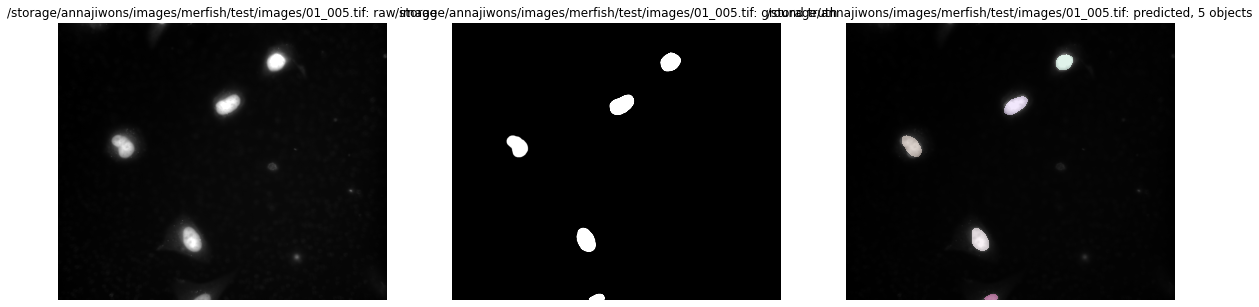

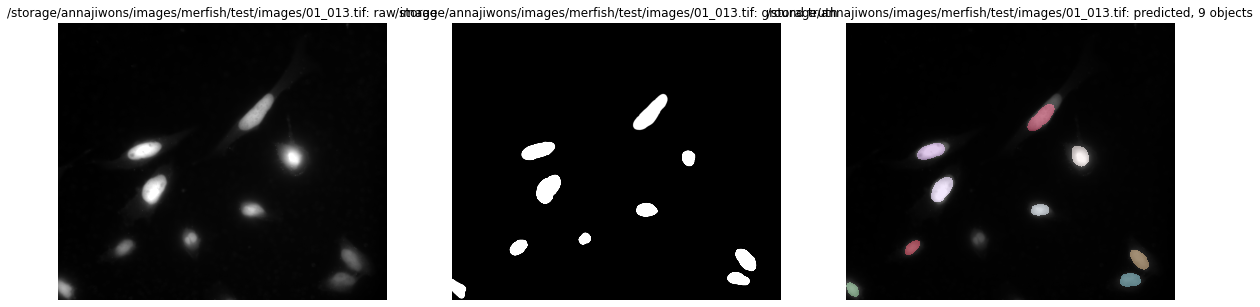

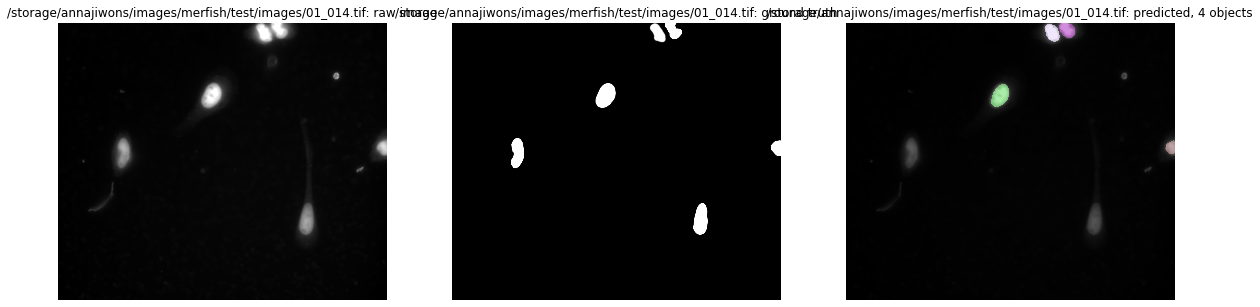

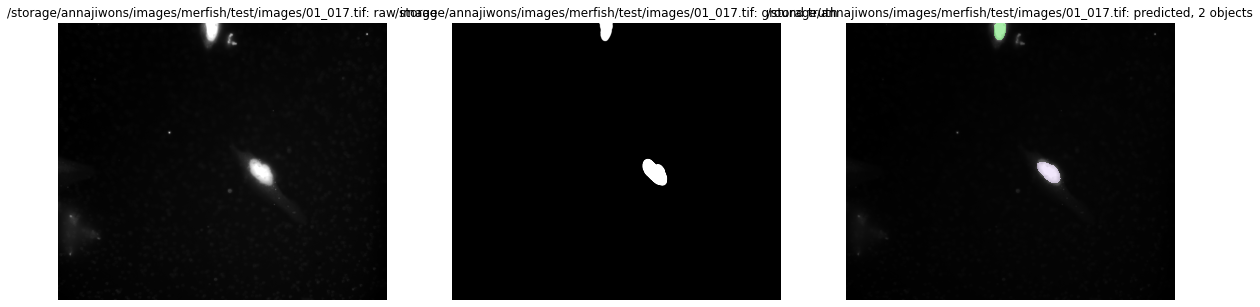

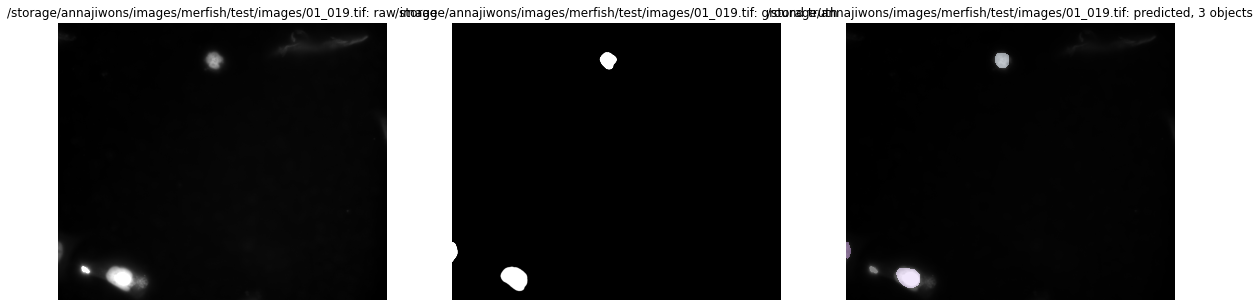

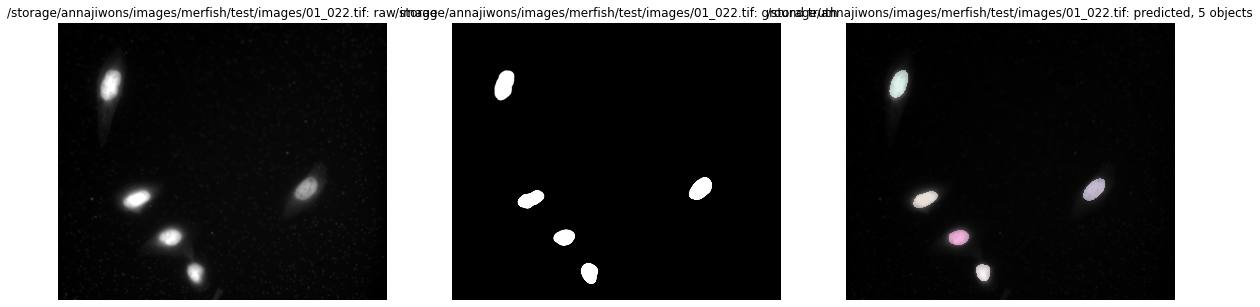

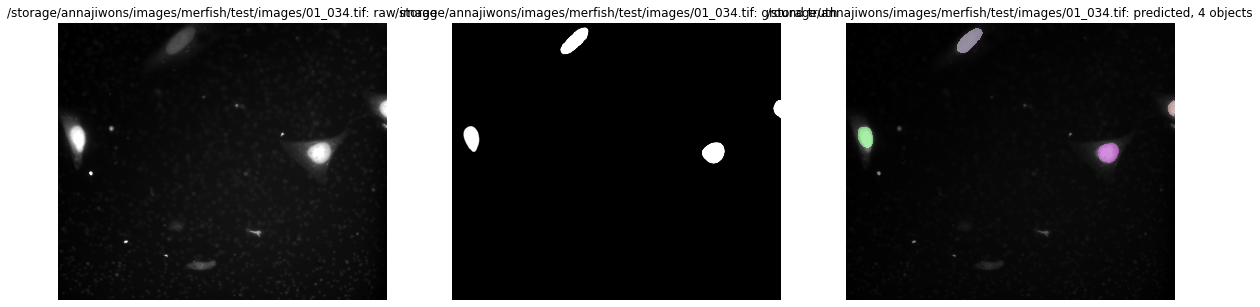

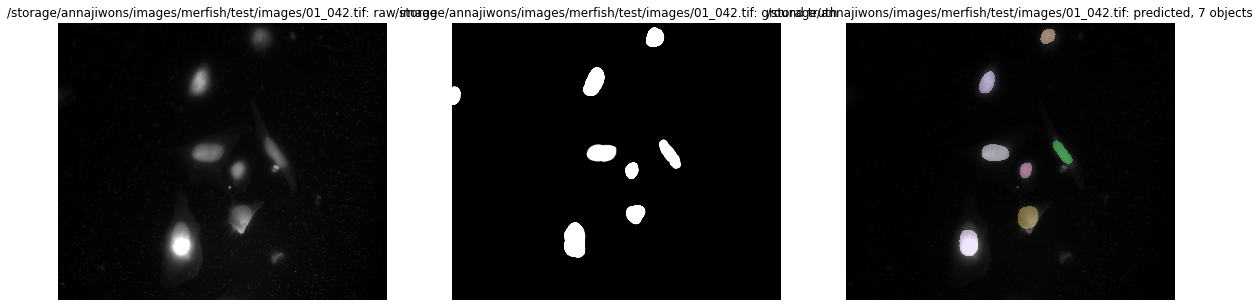

In [8]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [9]:
save_scores_csv(merfish_stats, '_fliprot')

In [9]:
cv.imwrite('model7.tif', merfish_Y_pred[1][0])

True

# Intensity Augmenter

In [10]:
# Load from disk
intensity_aug_merfish_model = StarDist2D(None, name='intensity_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [11]:
merfish_Y_pred = [intensity_aug_merfish_model.predict_instances(x, n_tiles=intensity_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [03:42<00:00, 27.83s/it]


In [12]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:56<00:00,  6.24s/it]


In [13]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=3, tp=42, fn=1, precision=0.9333333333333333, recall=0.9767441860465116, accuracy=0.9130434782608695, f1=0.9545454545454546, n_true=43, n_pred=45, mean_true_score=0.7930883066120213, mean_matched_score=0.8119713615313552, panoptic_quality=0.7750635723708391, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=3, tp=42, fn=1, precision=0.9333333333333333, recall=0.9767441860465116, accuracy=0.9130434782608695, f1=0.9545454545454546, n_true=43, n_pred=45, mean_true_score=0.7930883066120213, mean_matched_score=0.8119713615313552, panoptic_quality=0.7750635723708391, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=3, tp=42, fn=1, precision=0.9333333333333333, recall=0.9767441860465116, accuracy=0.9130434782608695, f1=0.9545454545454546, n_true=43, n_pred=45, mean_true_score=0.7930883066120213, mean_matched_score=0.8119713615313552, panoptic_quality=0.7750635723708391, by_image=False),
 DatasetMatching(criterio

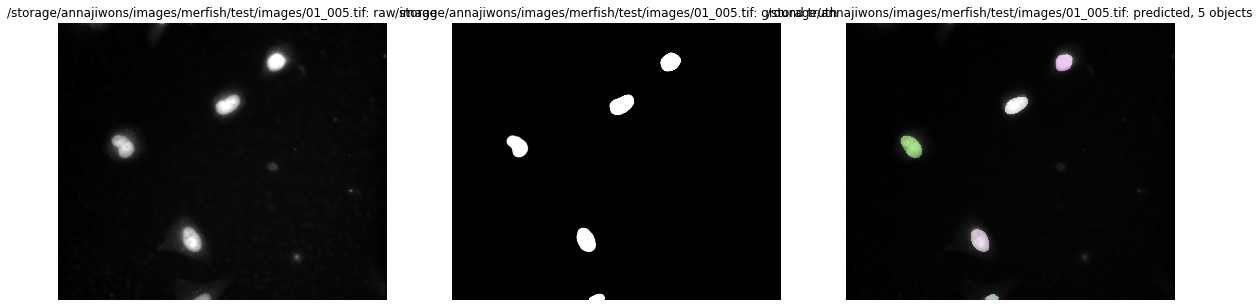

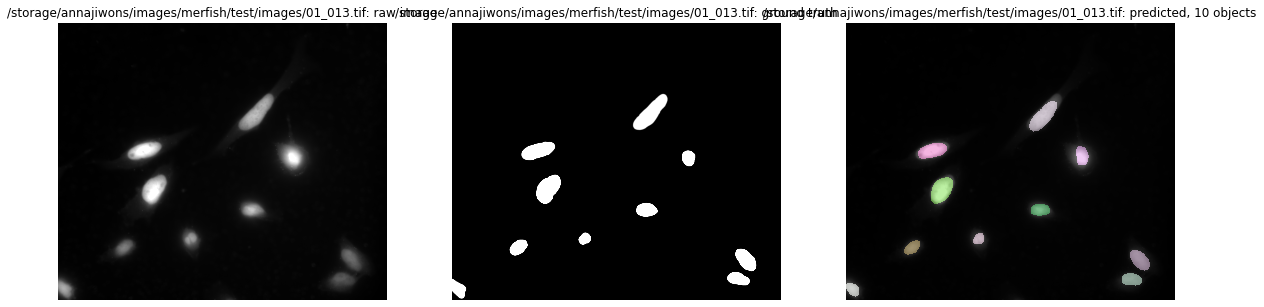

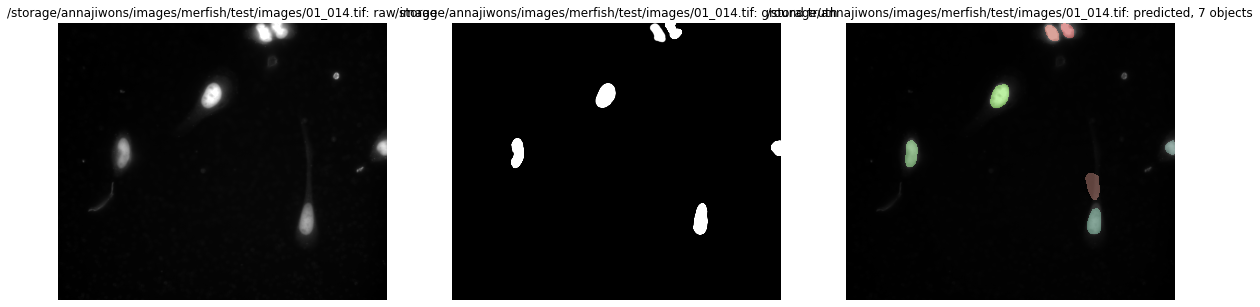

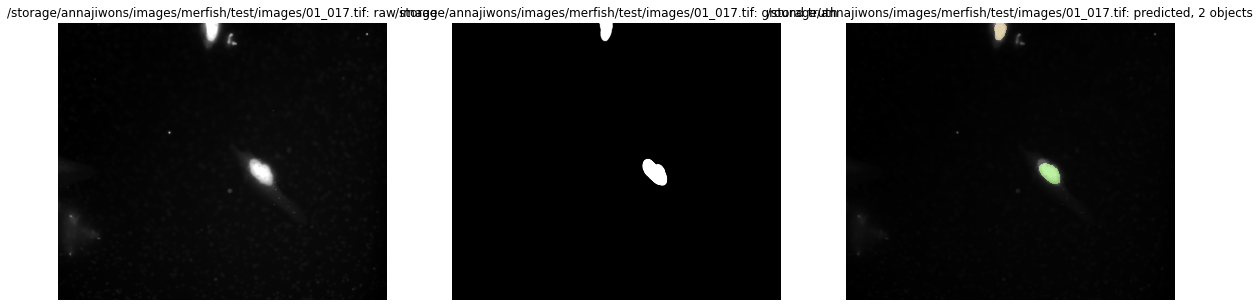

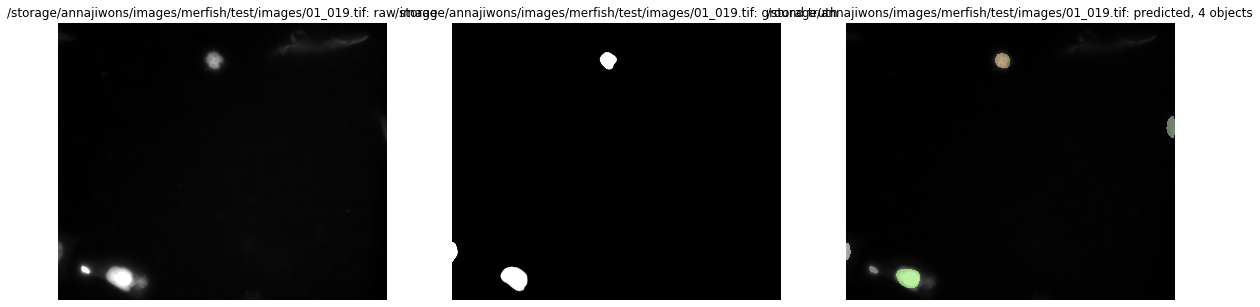

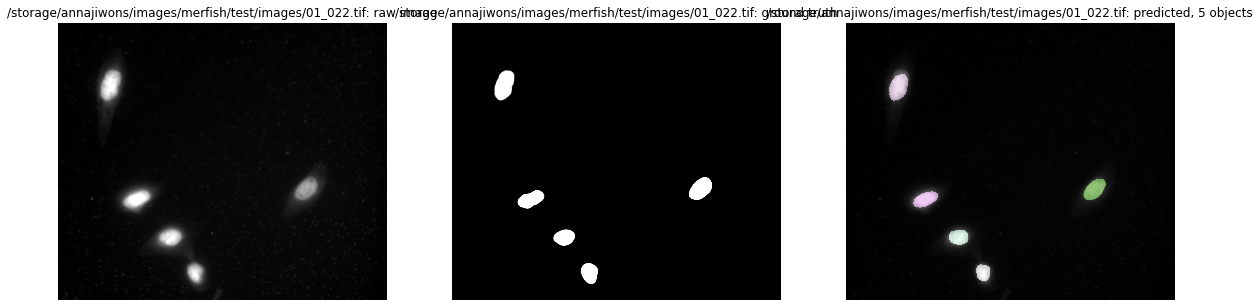

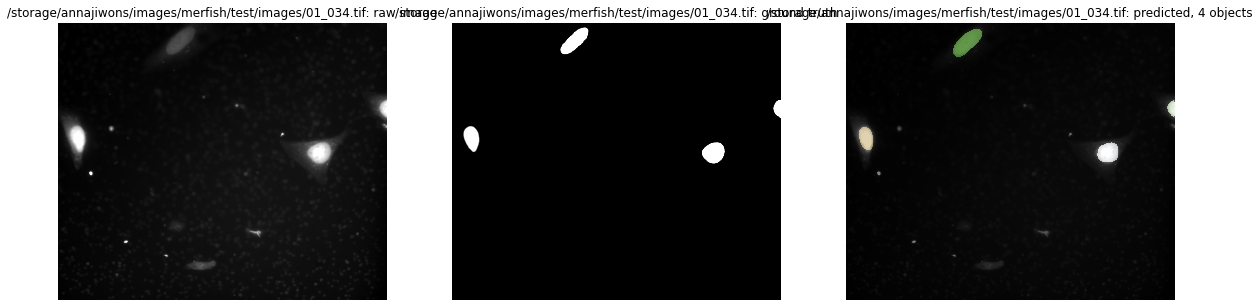

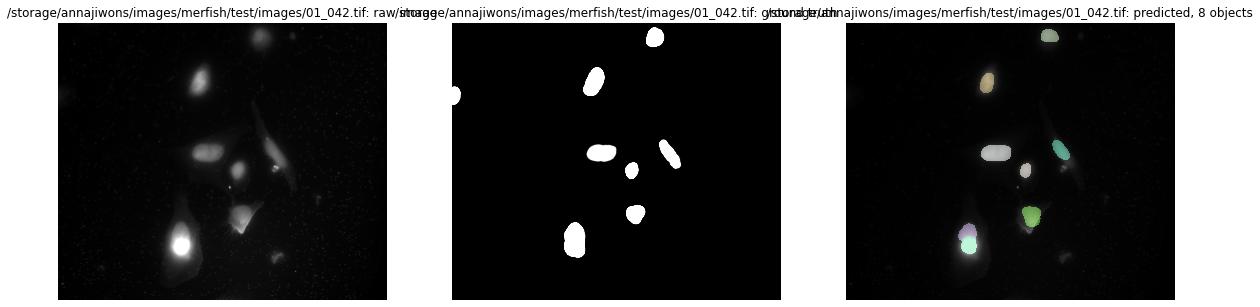

In [14]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [24]:
save_scores_csv(merfish_stats, '_intensity')

In [15]:
cv.imwrite('model8.tif', merfish_Y_pred[1][0])

True

# Noise Augmenter

In [16]:
# Load from disk
noise_aug_merfish_model = StarDist2D(None, name='noise_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Couldn't load thresholds from 'thresholds.json', using default values. (Call 'optimize_thresholds' to change that.)
Using default values: prob_thresh=0.5, nms_thresh=0.4.


In [17]:
merfish_Y_pred = [noise_aug_merfish_model.predict_instances(x, n_tiles=noise_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [04:32<00:00, 34.08s/it]


In [18]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:32<00:00,  3.60s/it]


In [19]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=42, fn=1, precision=1.0, recall=0.9767441860465116, accuracy=0.9767441860465116, f1=0.9882352941176471, n_true=43, n_pred=42, mean_true_score=0.8037196158837392, mean_matched_score=0.8228557972143045, panoptic_quality=0.8131751407764891, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=42, fn=1, precision=1.0, recall=0.9767441860465116, accuracy=0.9767441860465116, f1=0.9882352941176471, n_true=43, n_pred=42, mean_true_score=0.8037196158837392, mean_matched_score=0.8228557972143045, panoptic_quality=0.8131751407764891, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=42, fn=1, precision=1.0, recall=0.9767441860465116, accuracy=0.9767441860465116, f1=0.9882352941176471, n_true=43, n_pred=42, mean_true_score=0.8037196158837392, mean_matched_score=0.8228557972143045, panoptic_quality=0.8131751407764891, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=42, fn=1, preci

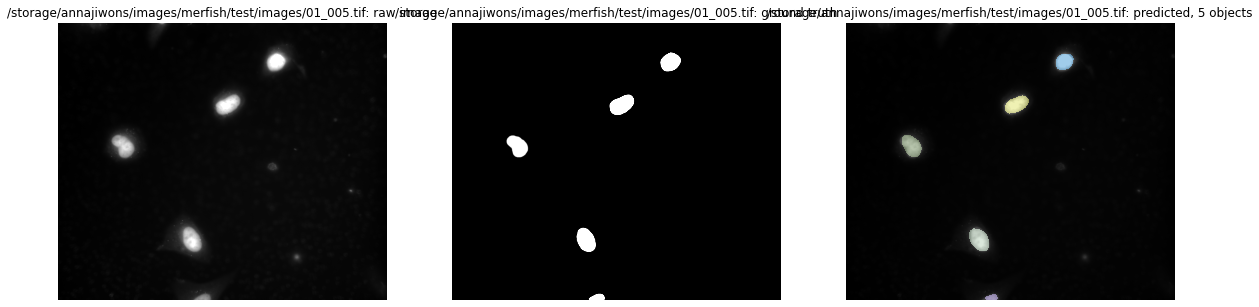

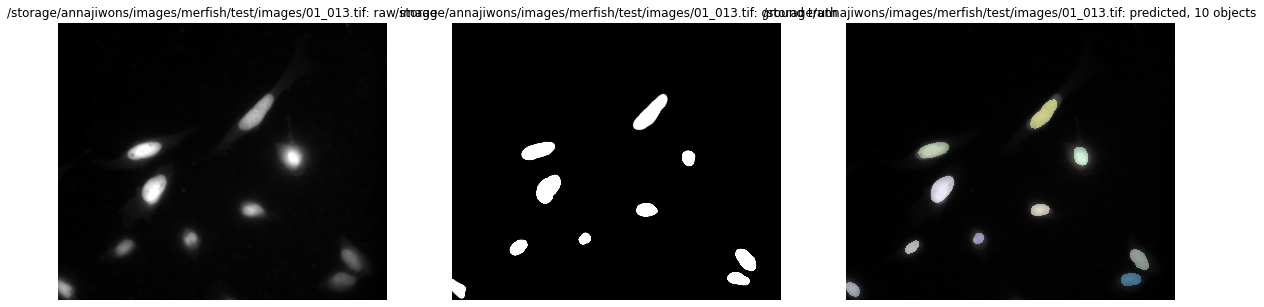

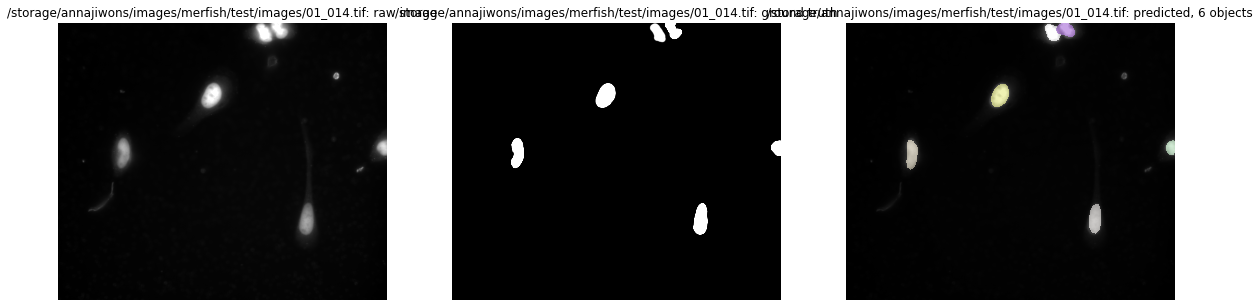

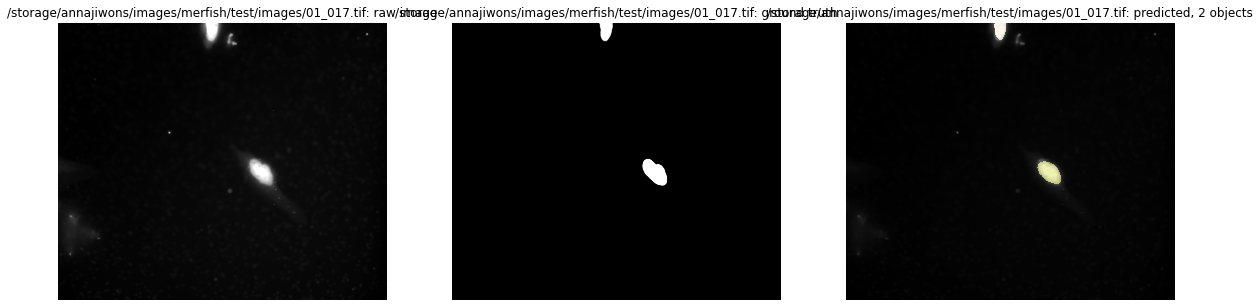

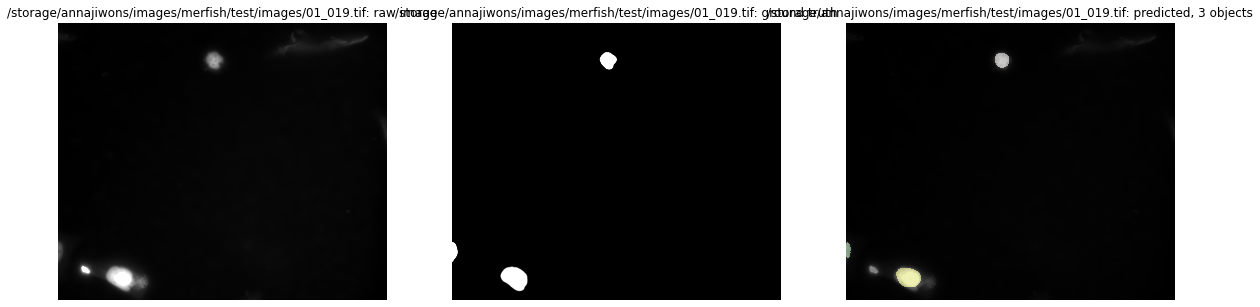

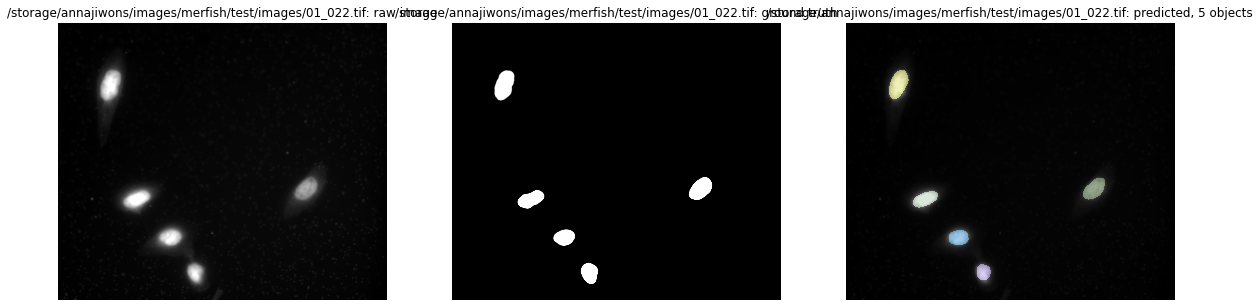

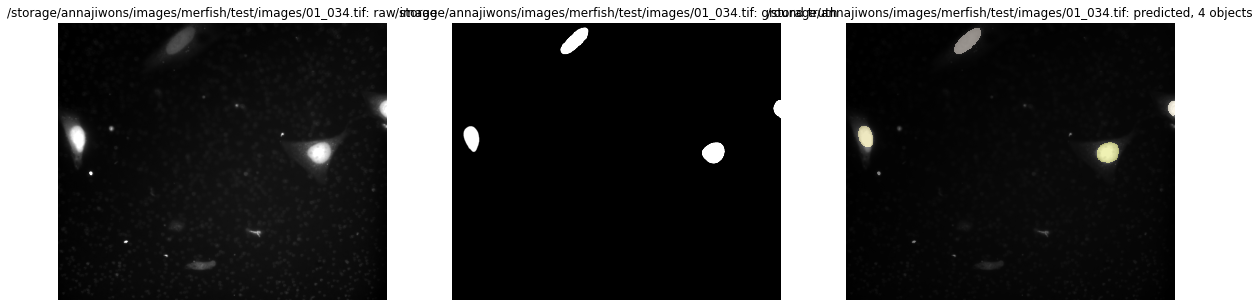

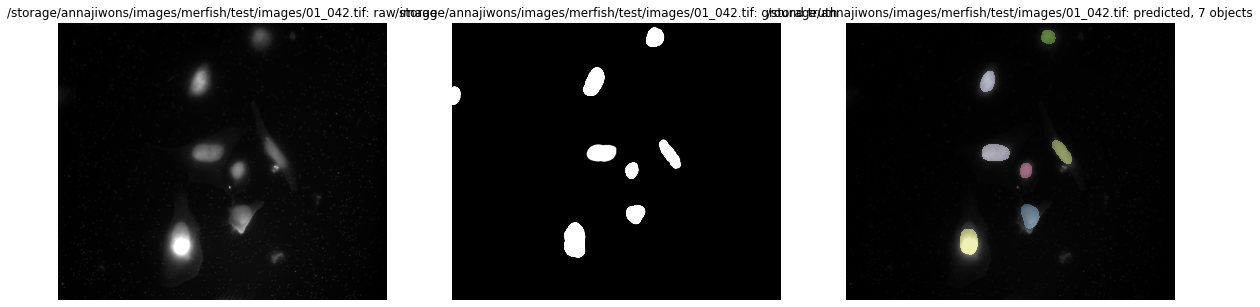

In [20]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

In [29]:
save_scores_csv(merfish_stats, '_noise')

In [21]:
cv.imwrite('model9.tif', merfish_Y_pred[1][0])

True